In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

In [4]:
df = df_Combined_News_DJIA.copy()
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
test.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,Weapons shipped into Jordan by the CIA and Sau...,Angela Merkel said the U.K. must file exit pap...,In a birth offering hope to a threatened speci...,Sky News Journalist Left Speechless As Leave M...,Giant panda in Macau gives birth to twins,Get out now: EU leader tells Britain it must i...,Sea turtle 'beaten and left for dead' on beach...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,UK's Osborne: 'Absolutely' going to have to cu...,'Do not let Scotland down now' : Scottish MEP ...,British pound could hit history-making dollar ...,"Merkel vows to strengthen EU, tells UK no 'che...","""Ryanair will not deploy new aircraft on route...","People, ever more greedy and stupid, destroy t...",Siemens freezes new UK wind power investment f...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,Iceland historian Johannesson wins presidentia...,99-Million-Yr-Old Bird Wings Found Encased in ...,A chatbot programmed by a British teenager has...,The Philippine president-elect said Monday he ...,Former Belgian Prime Minister ridicules Nigel ...,Brexiteer Nigel Farage To EU: 'You're Not Laug...,Islamic State bombings in southern Yemen kill ...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says p

In [5]:
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

In [6]:
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,b Rice Gives Green Light for Israel to Attack ...,b Announcing Class Action Lawsuit on Behalf of...,b So Russia and Georgia are at war and the N...,b China tells Bush to stay out of other countr...,b Did World War III start today,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,b Russia presses deeper into Georgia U S say...,b Abhinav Bindra wins first ever Individual Ol...,b U S ship heads for Arctic to define territ...,b Drivers in a Jerusalem taxi station threaten...,b The French Team is Stunned by Phelps and the...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,b Gorbachev Georgian military attacked the S...,b CNN use footage of Tskhinvali ruins to cover...,b Beginning a war as the Olympics were opening...,b pyramids as large as the Luxor stacked in...,b The Top Party Cities in the World,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s ac

In [7]:
for index in new_Index:
    data[index] = data[index].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,b rice gives green light for israel to attack ...,b announcing class action lawsuit on behalf of...,b so russia and georgia are at war and the n...,b china tells bush to stay out of other countr...,b did world war iii start today,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,b welcome to world war iv now in high definit...,b georgia s move a mistake of monumental prop...,b russia presses deeper into georgia u s say...,b abhinav bindra wins first ever individual ol...,b u s ship heads for arctic to define territ...,b drivers in a jerusalem taxi station threaten...,b the french team is stunned by phelps and the...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...


In [8]:
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
headlines[5]

'b mom of missing gay man  too bad he s not a    year old cheerleader  then they d still be looking for him  b russia  u s  poland missile deal won t go  unpunished   b the government has been accused of creating laws that have a chilling effect on freedom of expression in the uk in a critical report from the un s committee on human rights  b the italian government has lashed out at an influential catholic magazine which suggested fascism might be resurfacing within the government   b gorbachev  georgia started conflict in s  ossetia  b china fakes more than your girlfriend   ethnic minority  children at olympics ceremony were fake too   b the un s criticism of freedom of expression in the uk are valid  b russian general threatens nuclear strike on poland as bush demands moscow withdraws from georgia  b russia can inspect polish missile defence site  b russia georgia conflict fueled by rush to control caspian energy resources  b business week  victory in georgia gives russia the edge i

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [10]:
# implememt BAG OF WORDS
countVector = CountVectorizer(ngram_range=(2, 2))
#ngram(2,2) means it will combine the 2 words together and assign the value

trainDataset = countVector.fit_transform(headlines)

In [12]:
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
    
test_dataset = countVector.transform(testTransform)
predictions = randomClassifier.predict(test_dataset)

In [14]:
array = countVector.transform(testTransform).toarray()
print(array.shape)

(378, 403977)


In [ ]:
print(np.sum(array[1]))

449


In [ ]:
test.loc[1863, :]

Date                                            2016-01-04
Label                                                    0
Top1     Saudi Arabia breaks off ties with Iran - Amid ...
Top2     Exclusive: UK Government urged to reveal its r...
Top3                 China halts trading as stocks fall 7%
Top4      Earthquake measuring 6.8 magnitude strikes India
Top5     A virus linked to shrinking newborns brains is...
Top6     New photos of SpaceX booster show sooty, but u...
Top7     Indian consulate in Afghanistan under attack b...
Top8                             Iran calls off Major Hajj
Top9     Denmark responds to Swedish border checks with...
Top10    David Cameron criticised for turning 'blind ey...
Top11    Denmark introduces temporary controls along Ge...
Top12    Israel Retaliates to Hezbollah bombing at Leba...
Top13    China Aims to Build 40 Nuclear Power Plants in...
Top14    According to obtained documents, after rape an...
Top15    Western Australian rooftop solar systems produ.

In [ ]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[131  55]
 [  2 190]]
0.8492063492063492
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



In [ ]:
trainDataset

<1863x403977 sparse matrix of type '<class 'numpy.int64'>'
	with 771733 stored elements in Compressed Sparse Row format>

In [16]:
import pandas
import joblib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network
from sklearn import metrics

In [ ]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(400, 100, 100), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=5000, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
  
model.fit(trainDataset, train['Label']) 
   
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)

In [ ]:
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test['Label'], predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test['Label'], predictions))

Accuracy: 77.51
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70       186
           1       0.69      1.00      0.82       192

    accuracy                           0.78       378
   macro avg       0.85      0.77      0.76       378
weighted avg       0.84      0.78      0.76       378

Confusion Matrix:
[[101  85]
 [  0 192]]


In [ ]:
from sklearn import metrics

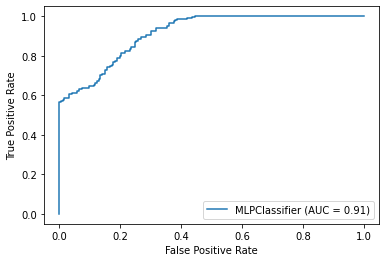

In [ ]:
metrics.plot_roc_curve(model, test_dataset, test['Label'])  
plt.show()

In [ ]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=5000, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
  
model.fit(trainDataset, train['Label']) 
   
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

0.7962962962962963

In [ ]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=5000, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
  
model.fit(trainDataset, train['Label']) 
   
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

0.8306878306878307

In [ ]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500, 100, 50), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=5000, shuffle=True, random_state=1, tol=0.00001, verbose=True, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
  
model.fit(trainDataset, train['Label']) 
   
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

Iteration 1, loss = 0.69277835
Validation score: 0.534759
Iteration 2, loss = 0.52772596
Validation score: 0.518717
Iteration 3, loss = 0.09169855
Validation score: 0.497326
Iteration 4, loss = 0.00585288
Validation score: 0.534759
Iteration 5, loss = 0.00072080
Validation score: 0.486631
Iteration 6, loss = 0.00066211
Validation score: 0.502674
Iteration 7, loss = 0.00038722
Validation score: 0.518717
Iteration 8, loss = 0.00036420
Validation score: 0.518717
Iteration 9, loss = 0.00035981
Validation score: 0.518717
Iteration 10, loss = 0.00035730
Validation score: 0.524064
Iteration 11, loss = 0.00035552
Validation score: 0.518717
Iteration 12, loss = 0.00035462
Validation score: 0.508021
Validation score did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


0.7195767195767195

In [19]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500, 50), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=20, shuffle=True, random_state=1, tol=0.00000001, verbose=True, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, epsilon=1e-08, n_iter_no_change=5)
  
model.fit(trainDataset, train['Label']) 
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

Iteration 1, loss = 0.69244151
Iteration 2, loss = 0.41183632
Iteration 3, loss = 0.17874951
Iteration 4, loss = 0.00894439
Iteration 5, loss = 0.00133078
Iteration 6, loss = 0.00069395
Iteration 7, loss = 0.00055804
Iteration 8, loss = 0.00050805
Iteration 9, loss = 0.00048322
Iteration 10, loss = 0.00046702
Iteration 11, loss = 0.00045503
Iteration 12, loss = 0.00044531
Iteration 13, loss = 0.00043705
Iteration 14, loss = 0.00042995
Iteration 15, loss = 0.00042372
Iteration 16, loss = 0.00041804
Iteration 17, loss = 0.00041297
Iteration 18, loss = 0.00040822
Iteration 19, loss = 0.00040403
Iteration 20, loss = 0.00040008


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8492063492063492

In [21]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500, 100, 50), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=20, shuffle=True, random_state=1, tol=0.000001, verbose=True, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, epsilon=1e-08, n_iter_no_change=5)
  
model.fit(trainDataset, train['Label']) 
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

Iteration 1, loss = 0.69186409
Iteration 2, loss = 0.58758788
Iteration 3, loss = 0.16815348
Iteration 4, loss = 0.00305797
Iteration 5, loss = 0.00059324
Iteration 6, loss = 0.00046997
Iteration 7, loss = 0.00035988
Iteration 8, loss = 0.00035292
Iteration 9, loss = 0.00035208
Iteration 10, loss = 0.00035175
Iteration 11, loss = 0.00035154
Iteration 12, loss = 0.00035139
Iteration 13, loss = 0.00035125
Iteration 14, loss = 0.00035113
Training loss did not improve more than tol=0.000001 for 5 consecutive epochs. Stopping.


0.8412698412698413

In [23]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500, 100, 50), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=10, shuffle=True, random_state=1, tol=0.000001, verbose=True, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, epsilon=1e-08, n_iter_no_change=5)
  
model.fit(trainDataset, train['Label']) 
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

Iteration 1, loss = 0.69186409
Iteration 2, loss = 0.58758788
Iteration 3, loss = 0.16815348
Iteration 4, loss = 0.00305797
Iteration 5, loss = 0.00059324
Iteration 6, loss = 0.00046997
Iteration 7, loss = 0.00035988
Iteration 8, loss = 0.00035292
Iteration 9, loss = 0.00035208
Iteration 10, loss = 0.00035175


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8412698412698413

In [26]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500, 50), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=15, shuffle=True, random_state=1, tol=0.00000001, verbose=True, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, epsilon=1e-08, n_iter_no_change=5)
  
model.fit(trainDataset, train['Label']) 
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

Iteration 1, loss = 0.69244151
Iteration 2, loss = 0.41183632
Iteration 3, loss = 0.17874951
Iteration 4, loss = 0.00894439
Iteration 5, loss = 0.00133078
Iteration 6, loss = 0.00069395
Iteration 7, loss = 0.00055804
Iteration 8, loss = 0.00050805
Iteration 9, loss = 0.00048322
Iteration 10, loss = 0.00046702
Iteration 11, loss = 0.00045503
Iteration 12, loss = 0.00044531
Iteration 13, loss = 0.00043705
Iteration 14, loss = 0.00042995
Iteration 15, loss = 0.00042372


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8518518518518519

In [27]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500, 40), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=15, shuffle=True, random_state=1, tol=0.00000001, verbose=True, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, epsilon=1e-08, n_iter_no_change=5)
  
model.fit(trainDataset, train['Label']) 
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

Iteration 1, loss = 0.69618004
Iteration 2, loss = 0.58474222
Iteration 3, loss = 0.49239427
Iteration 4, loss = 0.33840247
Iteration 5, loss = 0.06239079
Iteration 6, loss = 0.00301215
Iteration 7, loss = 0.00062345
Iteration 8, loss = 0.00046813
Iteration 9, loss = 0.00041533
Iteration 10, loss = 0.00039685
Iteration 11, loss = 0.00038982
Iteration 12, loss = 0.00038555
Iteration 13, loss = 0.00038257
Iteration 14, loss = 0.00037993
Iteration 15, loss = 0.00037763


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8412698412698413

In [28]:
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500, 40), activation='relu', solver='sgd', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, 
                                                 max_iter=9, shuffle=True, random_state=1, tol=0.00000001, verbose=True, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, epsilon=1e-08, n_iter_no_change=5)
  
model.fit(trainDataset, train['Label'], ) 
predictions = model.predict(test_dataset)
accuracy = sklearn.metrics.accuracy_score(test['Label'], predictions)
accuracy

Iteration 1, loss = 0.69618004
Iteration 2, loss = 0.58474222
Iteration 3, loss = 0.49239427
Iteration 4, loss = 0.33840247
Iteration 5, loss = 0.06239079
Iteration 6, loss = 0.00301215
Iteration 7, loss = 0.00062345
Iteration 8, loss = 0.00046813
Iteration 9, loss = 0.00041533


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8412698412698413